In [2]:
# fashionmnist 
import tensorflow as tf

In [34]:
# load data
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train,y_train),(x_test,y_test)=fashion_mnist.load_data()

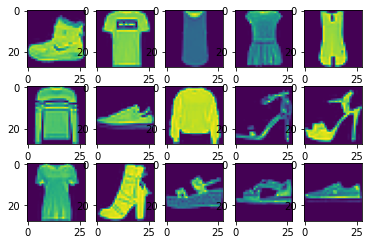

In [35]:
# 数据可视化
%matplotlib inline
import matplotlib.pyplot as plt
fig = plt.figure()
for i in range(15):
    plt.subplot(3,5,i+1)
    plt.imshow(x_train[i])

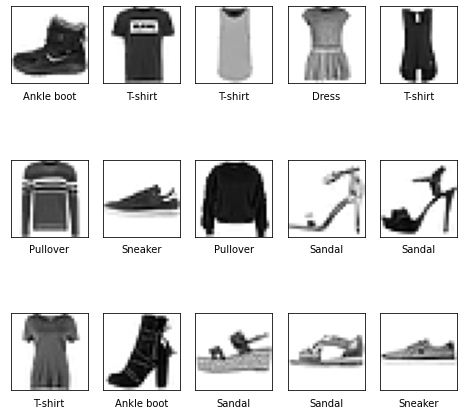

In [36]:
# 数据处理

classNames = ["T-shirt","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]
x_train = x_train/255.0
x_test = x_test/255.0

plt.figure(figsize=(8,8))
for i in range(15):
    plt.subplot(3,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.xlabel(classNames[y_train[i]])
    plt.imshow(x_train[i],cmap=plt.cm.binary)

In [37]:
# 模型构建
inputs = tf.keras.Input(shape=(28,28))
x = tf.keras.layers.Flatten(input_shape=(28,28))(inputs)
x = tf.keras.layers.Dense(128,activation='relu')(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = tf.keras.layers.Dense(10,activation="softmax")(x)

model = tf.keras.Model(inputs=inputs,outputs=outputs,name="fashion_mnist_model")


In [41]:
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(x_train,y_train,epochs=10)

Epoch 1/10
  25/1875 [..............................] - ETA: 7s - loss: 0.3069 - accuracy: 0.8925

2022-05-30 08:00:07.586310: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 8s 4ms/step - loss: 0.3129 - accuracy: 0.8848
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2981 - accuracy: 0.8896
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2896 - accuracy: 0.8932
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2822 - accuracy: 0.8949
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2753 - accuracy: 0.8968
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2647 - accuracy: 0.9002
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2606 - accuracy: 0.9029
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2554 - accuracy: 0.9042
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2519 - accuracy: 0.9050
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2458 - accurac

In [39]:
predictions = model.predict(x_test)
import numpy as np
print(f"predict:{np.argmax(predictions[0])}")
print(f"label:{y_test[0]}") 

110/313 [=========>....................] - ETA: 0s

2022-05-29 20:45:54.144652: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 0s 1ms/step
predict:9
label:9


In [ ]:
model.evaluate(x_test,y_test)

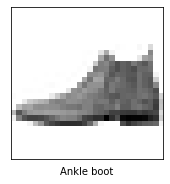

In [40]:
plt.subplot(1,2,1)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.xlabel(classNames[y_test[0]])
plt.imshow(x_test[0],cmap=plt.cm.binary)